In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#라벨이랑 디스턴스 저장해놓은 값 불러오기

real = []

f = open("label__.csv" , 'r')
label_ = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
label_ = np.array(label_)
label_ = label_.T
f.close()


f = open("distance.csv" , 'r')
pred = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
pred = np.array(pred)
pred = pred.T
f.close()

In [3]:
label_[1]

array([1.])

In [4]:
np.shape(label_.T)

(1, 490000)

In [6]:
np.shape(pred)

(490000, 1)

### ROC curve 그리기

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(label_, pred,pos_label=1)
roc_score = roc_auc_score(label_, pred)

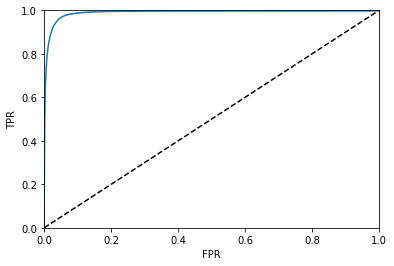

In [8]:

plt.plot([0, 1], [0, 1], 'k--')    
plt.axis([0, 1, 0, 1])    
plt.xlabel('FPR')    
plt.ylabel('TPR')    
plt.plot(fpr, tpr)
plt.show()

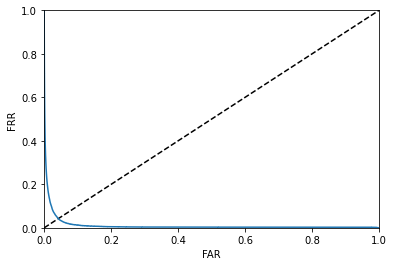

In [9]:
plt.plot([0, 1], [0, 1], 'k--')    
plt.axis([0, 1, 0, 1])    
plt.xlabel('FAR')    
plt.ylabel('FRR')    
plt.plot(fpr[1:], 1-tpr[1:])
plt.show()

In [10]:
roc_score

0.9889269371559242

### EER 찾기

In [11]:
for i  in range(int(len(fpr))):
    a = np.round(fpr[i],4)
    b = np.round(1 - tpr[i],4)
    if a == b:
        EER= a
        print('EER = ',i)
        print(a)

EER =  9672
0.0422
EER =  9673
0.0422


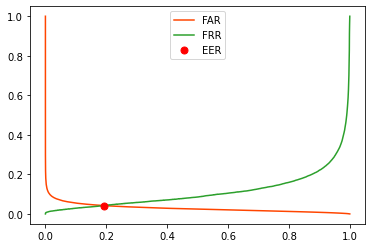

In [12]:
plt.plot(thresholds[1:],fpr[1:], color = 'orangered', label='FAR')
plt.plot(thresholds[1:],1- tpr[1:], color = 'tab:green', label='FRR')
plt.plot(thresholds[9673],fpr[9672],  'o' ,ms=7 ,color = 'red', label='EER')
plt.legend() 

### jenuine imposter 그래프

In [13]:
f = open("genuin.csv" , 'r')
genuin = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
genuin = np.array(genuin)
genuin = genuin.T
f.close()


f = open("imposter.csv" , 'r')
imposter = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
imposter = np.array(imposter)
imposter = imposter.T
f.close()

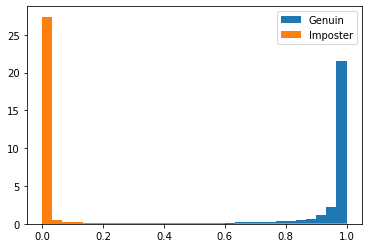

In [24]:
plt.hist(genuin, bins = 30, label='Genuin', density = True, stacked  = True)
plt.hist(imposter, bins = 30, label='Imposter', density= True,stacked  = True)
plt.legend()
plt.show()

In [26]:
np.shape(imposter)

(475124, 1)